# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [3]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------
from sklearn.feature_selection import SelectKBest, chi2 ,mutual_info_classif
from sklearn.svm import SVC 
from numpy import mean ,std
from sklearn.model_selection import  cross_validate ,RepeatedKFold , RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier, BaggingClassifier

# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [4]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [ ]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [ ]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [12]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [5]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\Roman\Desktop\למידת מכונה\5


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [6]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [7]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [8]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [9]:
#Preprocessing stage
#Preprocess a story by removing punctuation, symbols, numbers and whitespaces
def preprocess_story(story):
    story = re.sub(r'[^\w\s]', '', story)
    story = re.sub(r'\d+', '', story)
    story = re.sub(r'\s+', ' ', story).strip()    
    return story

#Preprocess the data, either for training, or testing
def preprocess_df(vectorizer = 'TfidfVectorizer' , ngram_range = (1,1) ,min_df = 5 , k =1000 , test = False ):
    if test: #If we use the test corpus, otherwise use the train corpus
        df = pd.read_csv('corpus_for_test.csv', index_col=None, encoding='utf-8') #Load data
        df['story'] = df['story'].apply(preprocess_story) #Preprocess data
        vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=ngram_range) #Vectorize data
        X_test = df['story']
        X_test_vect = vectorizer.fit_transform(X_test)
        selector = SelectKBest(mutual_info_classif, k=k) #Feature selection using mutual information
        X_test_selected = selector.fit_transform(X_test_vect, np.zeros(X_test_vect.shape[0]))
        scaler = MinMaxScaler()
        X_test_scaled = scaler.fit_transform(X_test_selected.toarray())
        
        return df['story'], X_test_scaled
    
    df = pd.read_csv('annotated_corpus_for_train.csv', index_col=None, encoding='utf-8') #Load data
    df['story'] = df['story'].apply(preprocess_story) #Preprocess data
    X_train, X_test, y_train, y_test = train_test_split(df['story'], df['gender'], test_size=0.2, random_state=42) #Split data
    if vectorizer == 'TfidfVectorizer': #Vectorize using tf-idf
        vectorizer = TfidfVectorizer(min_df= min_df ,ngram_range= ngram_range)
    if vectorizer == 'CountVectorizer': #Vectorize using count vectorizer
        vectorizer = CountVectorizer(min_df= min_df)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    selector = SelectKBest(mutual_info_classif, k=k) #Feature selection using mutual information
    selector.fit(X_train_vect, y_train)
    X_train_selected = selector.transform(X_train_vect)
    X_test_selected = selector.transform(X_test_vect)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected.toarray())
    X_test_scaled = scaler.transform(X_test_selected.toarray())
    
    return X_train_scaled , X_test_scaled , X_train, X_test, y_train, y_test

In [13]:
#Model selection, defining our models and ensemble
#Creating our ensemble
def get_stacking(params):
    # Assuming it is better to use bagging, based on internet scrolling and stackoverflow
    level0 = []
    level0.append(('LinearSVC_bagging', BaggingClassifier(base_estimator=LinearSVC(**params['LinearSVC']), n_estimators=100, max_samples=0.8, oob_score=False)))
    level0.append(('MLPClassifier', MLPClassifier(**params['MLPClassifier'])))
    level0.append(('Perceptron', Perceptron(**params['Perceptron'])))
    level0.append(('SGDClassifier_bagging', BaggingClassifier(base_estimator=SGDClassifier(**params['SGDClassifier']), n_estimators=100, max_samples=0.8, oob_score=False)))
    level0.append(('KNN_bagging', BaggingClassifier(base_estimator=KNeighborsClassifier(**params['KNN']), n_estimators=100, max_samples=0.8, oob_score=False)))
    level0.append(('CART_bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(**params['CART']), n_estimators=100, max_samples=0.8, oob_score=False)))
    level0.append(('SVM_bagging', BaggingClassifier(base_estimator=SVC(**params['SVM']), n_estimators=100, max_samples=0.8, oob_score=False)))
    level0.append(('LogisticRegression_bagging', BaggingClassifier(base_estimator=LogisticRegression(**params['LogisticRegression']), n_estimators=100, max_samples=0.8, oob_score=False)))
    level1 = LogisticRegression(**params['LogisticRegression'])
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model 

#Base models and ensemble classifiers dict
def get_models(params):
    models = dict()
    models['LinearSVC'] = LinearSVC(**params['LinearSVC'])
    models['MLPClassifier'] = MLPClassifier(**params['MLPClassifier'])
    models['Perceptron'] = Perceptron(**params['Perceptron'])
    models['SGDClassifier'] = SGDClassifier(**params['SGDClassifier'])
    models['KNN'] = KNeighborsClassifier(**params['KNN'])
    models['CART'] = DecisionTreeClassifier(**params['CART'])
    models['SVM'] = SVC(**params['SVM'])
    models['LogisticRegression'] = LogisticRegression(**params['LogisticRegression']) 
    models['Stacking'] = get_stacking(params)
    return models

In [14]:
#Model training and evaluation stage
#Train and evaluate our models
def eval_model(model,X_train_selected, X_test_selected  ,y_train, y_test):
    model_train = model.fit(X_train_selected , y_train) #Train
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(model_train, X_test_selected, y_test, scoring='accuracy', cv=cv, n_jobs=-1  )
    y_pred = model_train.predict(X_test_selected)
    f1_male = f1_score(y_test, y_pred, pos_label='m')
    f1_female = f1_score(y_test, y_pred, pos_label='f')
    average_f1=(f1_male + f1_female)/2
    conf_mat = confusion_matrix(y_test, y_pred)

    return {'Accuracy': {'mean': mean(scores),'std': std(scores)},
            'F1 Score (male)': f1_male,
            'F1 Score (female)': f1_female,
            'Confusion Matrix': conf_mat,
            'scores':scores ,
            'y_pred':y_pred,
            'average_f1':average_f1,
            'model':model_train}

#Parameter tuning
def find_best_params(models , X_train_selected ,y_train ):
    best_params = {}
    for name, model in models.items():
        clf = GridSearchCV(model, base_params[name], cv=5, n_jobs=-1)
        clf.fit(X_train_selected, y_train)
        best_params[name] = clf.best_params_
        
    return best_params

#Let's put it to use
base_params = {'LinearSVC': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'dual': [False]},
               'MLPClassifier': {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                                 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']},
               'Perceptron': {'alpha': [0.0001, 0.05], 'penalty': [None, 'l2', 'l1', 'elasticnet']},
               'SGDClassifier': {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.05]},
               'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
               'CART': {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']},
               'SVM': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
               'LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}}
          
models_list = {'LinearSVC':LinearSVC(),
               'MLPClassifier':MLPClassifier(),
               'Perceptron':Perceptron(),
               'SGDClassifier':SGDClassifier(),
               'KNN': KNeighborsClassifier(),
               'CART': DecisionTreeClassifier(),
               'SVM': SVC(),
               'LogisticRegression': LogisticRegression()}

X_train_selected , X_test_selected , X_train, X_test, y_train, y_test = preprocess_df(ngram_range = (1,1))
best_params = find_best_params(models_list , X_train_selected ,y_train )
models = get_models(best_params)
conf_mats = []
results, names = list(), list()
y_pred = []
score = {}
for name, model in models.items():
    scores = eval_model(model, X_train_selected, X_test_selected, y_train, y_test)
    results.append(scores['scores'])
    names.append(name)
    score[name] = scores
    y_pred.append(scores['y_pred'])
    print('>%s Accuracy: %.3f (%.3f)' % (name, scores['Accuracy']['mean'], scores['Accuracy']['std']))
    print('F1 Score (female): %.3f' % (scores['F1 Score (female)']))
    print('F1 Score (male): %.3f' % (scores['F1 Score (male)']))
    print('F1 Score **(average_f1)**: %.3f\n\n\n' % (scores['average_f1']))


>LinearSVC Accuracy: 0.771 (0.094)
F1 Score (female): 0.478
F1 Score (male): 0.851
F1 Score **(average_f1)**: 0.664



>MLPClassifier Accuracy: 0.746 (0.089)
F1 Score (female): 0.464
F1 Score (male): 0.878
F1 Score **(average_f1)**: 0.671



>Perceptron Accuracy: 0.771 (0.109)
F1 Score (female): 0.629
F1 Score (male): 0.888
F1 Score **(average_f1)**: 0.758



>SGDClassifier Accuracy: 0.768 (0.091)
F1 Score (female): 0.453
F1 Score (male): 0.884
F1 Score **(average_f1)**: 0.668



>KNN Accuracy: 0.753 (0.091)
F1 Score (female): 0.000
F1 Score (male): 0.860
F1 Score **(average_f1)**: 0.430



>CART Accuracy: 0.693 (0.093)
F1 Score (female): 0.423
F1 Score (male): 0.880
F1 Score **(average_f1)**: 0.652



>SVM Accuracy: 0.766 (0.097)
F1 Score (female): 0.456
F1 Score (male): 0.873
F1 Score **(average_f1)**: 0.665



>LogisticRegression Accuracy: 0.759 (0.094)
F1 Score (female): 0.444
F1 Score (male): 0.879
F1 Score **(average_f1)**: 0.662



>Stacking Accuracy: 0.751 (0.090)
F1 Score (fem

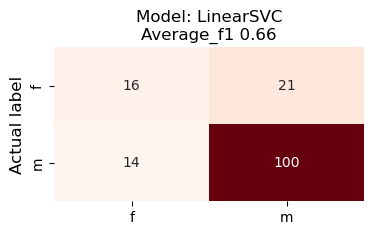

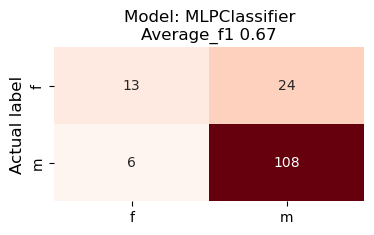

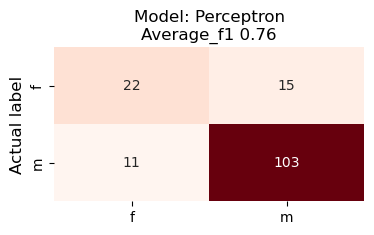

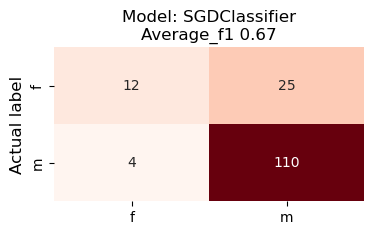

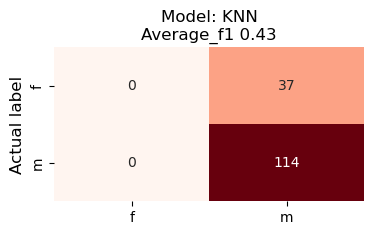

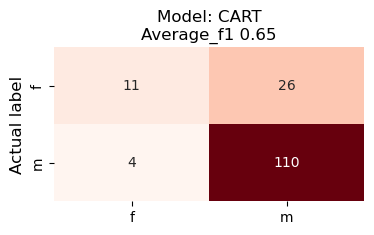

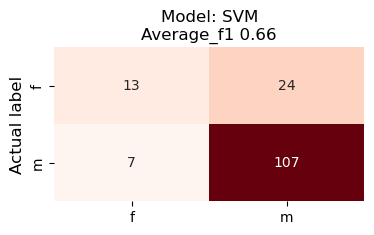

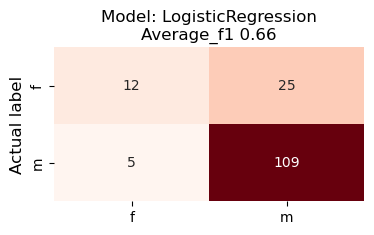

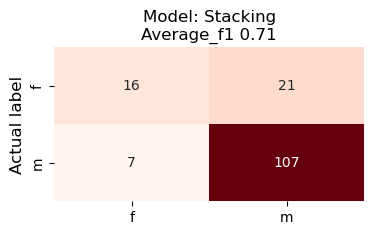

In [31]:
#Evaluation using confusion matrix
def plot_matrix(score):
    for mod in score:
        fig, ax = plt.subplots(figsize=(4, 2))
        sns.heatmap(score[mod]['Confusion Matrix'], annot=True, fmt='g', cmap='Reds', cbar=False,
                    annot_kws={'fontsize': 10}, ax=ax)
        ax.set_ylabel('Actual label', fontsize=12)
        ax.set_xticklabels(['f', 'm'], fontsize=10)
        ax.set_yticklabels(['f', 'm'], fontsize=10)
        ax.set_title(f"Model: {mod}\nAverage_f1 {score[mod]['average_f1']:.2f}", fontsize=12)
        plt.show()
        
plot_matrix(score)

In [33]:
#Prediction using the test data
data, test_data = preprocess_df(test =True)
df_predict_dict = {}
for mod in score:
    y_pred = score[mod]['model'].predict(test_data)
    df_predict = pd.DataFrame({'story': data, 'predicted gender': y_pred})
    print(f"Model {mod}")
    print(df_predict['predicted gender'].value_counts())
    print("\n")
    df_predict_dict[mod] = df_predict
df_predicted = df_predict_dict['Stacking']

#Predictions of first and last 5 rows as requested in the instructions
print("\nPredictions for the first 5 rows:")
print(df_predicted[:5])
print("\nPredictions for the last 5 rows:")
print(df_predicted[-5:])

Model LinearSVC
m    187
f    136
Name: predicted gender, dtype: int64


Model MLPClassifier
m    202
f    121
Name: predicted gender, dtype: int64


Model Perceptron
m    187
f    136
Name: predicted gender, dtype: int64


Model SGDClassifier
m    301
f     22
Name: predicted gender, dtype: int64


Model KNN
m    323
Name: predicted gender, dtype: int64


Model CART
m    286
f     37
Name: predicted gender, dtype: int64


Model SVM
m    291
f     32
Name: predicted gender, dtype: int64


Model LogisticRegression
m    275
f     48
Name: predicted gender, dtype: int64


Model Stacking
m    233
f     90
Name: predicted gender, dtype: int64



Predictions for the first 5 rows:
                                               story predicted gender
0  כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...                m
1  הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת י...                m
2  אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...                m
3  רגע הגיוס לצבא היה הרגע הכי משמעות

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [34]:
df_predicted.to_csv('classification_results.csv',index=False)